In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_init=pd.read_csv('initial.csv')
df_init.head()

,Unnamed: 0,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,...,10D,10E,10F,10G,10H,10I,10J,ACTION,CRITICAL FLAG,GRADE
0,93905,30075445,2017-05-18,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A
1,93904,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,0,A
2,93907,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,B
3,93360,30112340,2016-10-03,48.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,3,C
4,93364,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A


In [3]:
df_init.drop(columns='Unnamed: 0',inplace=True)

In [4]:
df_rests=pd.read_csv('rests.csv')
df_rests.rename(columns={'Unnamed: 0':'CAMIS'},inplace=True)
df_rests.head()

,CAMIS,DBA,CUISINE DESCRIPTION,BORO,BUILDING,STREET,ZIPCODE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,is_chain
0,30075445,MORRIS PARK BAKE SHOP,Bakery,Bronx,1007,MORRIS PARK AVE,10462.0,40.848231,-73.855972,211.0,13.0,25200.0,2045445.0,2.041270e+09,BX37,0
1,30112340,WENDY'S,Hamburgers,Brooklyn,469,FLATBUSH AVENUE,11225.0,40.662652,-73.962081,309.0,40.0,32700.0,3029737.0,3.011970e+09,BK60,1
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,Irish,Manhattan,351,WEST 57 STREET,10019.0,40.767326,-73.984310,104.0,3.0,13900.0,1026048.0,1.010480e+09,MN15,0
3,40356018,RIVIERA CATERERS,American,Brooklyn,2780,STILLWELL AVENUE,11224.0,40.579920,-73.982090,313.0,47.0,34800.0,3347399.0,3.069970e+09,BK21,0
4,40356151,BRUNOS ON THE BOULEVARD,American,Queens,8825,ASTORIA BOULEVARD,11369.0,40.763971,-73.880973,403.0,22.0,32900.0,4024132.0,4.011000e+09,QN28,0


In [5]:
df_small_init=df_init[['CAMIS','GRADE']]
df_small_rests=df_rests[['CAMIS','CUISINE DESCRIPTION','Community Board']]

In [6]:
df_matrix=df_small_init.merge(df_small_rests,on='CAMIS',)
df_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65932 entries, 0 to 65931
Data columns (total 4 columns):
CAMIS                  65932 non-null int64
GRADE                  65932 non-null object
CUISINE DESCRIPTION    65932 non-null object
Community Board        64699 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.5+ MB


In [7]:
df_matrix.head()

,CAMIS,GRADE,CUISINE DESCRIPTION,Community Board
0,30075445,A,Bakery,211.0
1,30075445,A,Bakery,211.0
2,30075445,B,Bakery,211.0
3,30112340,C,Hamburgers,309.0
4,30112340,A,Hamburgers,309.0


In [8]:
df_matrix.dropna(inplace=True)
df_matrix['Community Board']=df_matrix['Community Board'].astype(int).astype(str)
df_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64699 entries, 0 to 65931
Data columns (total 4 columns):
CAMIS                  64699 non-null int64
GRADE                  64699 non-null object
CUISINE DESCRIPTION    64699 non-null object
Community Board        64699 non-null object
dtypes: int64(1), object(3)
memory usage: 2.5+ MB


In [9]:
df_matrix_sparse=pd.get_dummies(df_matrix)
df_matrix_sparse.head()

,CAMIS,GRADE_A,GRADE_B,GRADE_C,CUISINE DESCRIPTION_Afghan,CUISINE DESCRIPTION_African,CUISINE DESCRIPTION_American,CUISINE DESCRIPTION_Armenian,CUISINE DESCRIPTION_Asian,CUISINE DESCRIPTION_Australian,...,Community Board_413,Community Board_414,Community Board_480,Community Board_481,Community Board_482,Community Board_483,Community Board_501,Community Board_502,Community Board_503,Community Board_595
0,30075445,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30075445,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30075445,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30112340,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30112340,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X=df_matrix_sparse.drop(columns=['CAMIS','GRADE_A','GRADE_B','GRADE_C'])
y=df_matrix_sparse['GRADE_A']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
param_grid_ada={'n_estimators': [30, 50, 70,100,150],
                'learning_rate': [1.0, 0.5, 0.1]}
grid_ada=GridSearchCV(estimator=AdaBoostClassifier(),
                     param_grid=param_grid_ada,
                     cv=3,
                     verbose=2)
grid_ada.fit(X_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] learning_rate=1.0, n_estimators=30 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... learning_rate=1.0, n_estimators=30, total=   2.0s
[CV] learning_rate=1.0, n_estimators=30 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ............... learning_rate=1.0, n_estimators=30, total=   2.1s
[CV] learning_rate=1.0, n_estimators=30 ..............................
[CV] ............... learning_rate=1.0, n_estimators=30, total=   2.2s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=   3.4s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=   3.4s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=   3.4s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] ............... learning_rate=1.0, n_estimators=70, total=   4.6s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] ............... learning_rate=1.0, n_estimators=70, total=   4.7s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [1.0, 0.5, 0.1],
                         'n_estimators': [30, 50, 70, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [13]:
grid_ada.best_params_

{'learning_rate': 1.0, 'n_estimators': 150}

In [14]:
grid_ada.best_score_

0.6159122085048011

In [15]:
y_pred = grid_ada.best_estimator_.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 888 4116]
 [ 819 7117]]
              precision    recall  f1-score   support

           0       0.52      0.18      0.26      5004
           1       0.63      0.90      0.74      7936

    accuracy                           0.62     12940
   macro avg       0.58      0.54      0.50     12940
weighted avg       0.59      0.62      0.56     12940



In [16]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_sample(X, y) 

Using TensorFlow backend.


In [17]:
from sklearn.model_selection import train_test_split
X_resampled_train, X_resampled_test,y_resampled_train, y_resampled_test=train_test_split(X_resampled,y_resampled,test_size=0.2)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
param_grid_ada={'n_estimators': [30, 50, 70,100,150],
                'learning_rate': [1.0, 0.5, 0.1]}
grid_ada_res=GridSearchCV(estimator=AdaBoostClassifier(),
                     param_grid=param_grid_ada,
                     cv=3,
                     verbose=2)
grid_ada_res.fit(X_resampled_train,y_resampled_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] learning_rate=1.0, n_estimators=30 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... learning_rate=1.0, n_estimators=30, total=   4.4s
[CV] learning_rate=1.0, n_estimators=30 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV] ............... learning_rate=1.0, n_estimators=30, total=   4.3s
[CV] learning_rate=1.0, n_estimators=30 ..............................
[CV] ............... learning_rate=1.0, n_estimators=30, total=   4.3s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=   7.1s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=   7.5s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] ............... learning_rate=1.0, n_estimators=50, total=   7.1s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] ............... learning_rate=1.0, n_estimators=70, total=  10.0s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] ............... learning_rate=1.0, n_estimators=70, total=  10.0s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  8.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [1.0, 0.5, 0.1],
                         'n_estimators': [30, 50, 70, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [19]:
grid_ada_res.best_params_

{'learning_rate': 1.0, 'n_estimators': 150}

In [20]:
grid_ada_res.best_score_

0.5846031746031746

In [21]:
y_res_pred = grid_ada_res.best_estimator_.predict(X_resampled_test)
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_resampled_test,y_res_pred))
print(classification_report(y_resampled_test,y_res_pred))

[[4978 2972]
 [3559 4241]]
              precision    recall  f1-score   support

           0       0.58      0.63      0.60      7950
           1       0.59      0.54      0.56      7800

    accuracy                           0.59     15750
   macro avg       0.59      0.58      0.58     15750
weighted avg       0.59      0.59      0.58     15750



In [22]:
df_matrix_sparse['GRADE_A'].value_counts()

1    39375
0    25324
Name: GRADE_A, dtype: int64

In [23]:
X_train.shape

(51759, 153)

In [24]:
from keras import Sequential,layers,models

model=models.Sequential()
model.add(layers.Dense(100,input_shape=(153,),activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history0=model.fit(X_train,y_train,epochs=50,batch_size=256,validation_split=0.1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 46583 samples, validate on 5176 samples
Epoch 1/50
46583/46583 [==============================] - 2s 35us/step - loss: 0.6601 - acc: 0.6067 - val_loss: 0.6454 - val_acc: 0.6293
Epoch 2/50
46583/46583 [==============================] - 0s 9us/step - loss: 0.6496 - acc: 0.6185 - val_loss: 0.6435 - val_acc: 0.6316
Epoch 3/50
46583/46583 [==============================] - 0s 9us/step - loss: 0.6463 - acc: 0.6237 - val_loss: 0.6415 - val_acc: 0.6347
Epoch 4/50
46583/46583 [==============================] - 0s 9us/step - loss: 0.6442 - acc: 0.6253 - val_loss: 0.6417 - val_acc: 0.6397
Epoch 5/50
46583/46583 [==============================] - 0s 9us/step - loss: 0.6424 - acc: 0.6277 - val_loss: 0.6406 - val_acc: 0.6366
Epoch 6/50
46583/46583 [==============================] - 0s 9us/step - loss: 0.6408 - acc: 0.6301 - val_loss: 0.6405 - val_acc: 0.6364
Epoch 7/50
465

In [25]:
def plt_hist(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

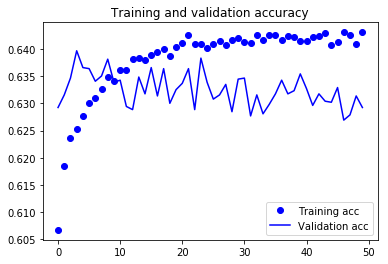

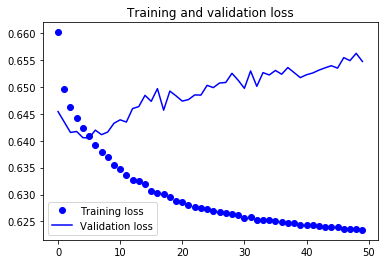

In [26]:
plt_hist(history0)